In [1]:
import pandas as pd
import numpy as np
import os
import sys

sys.path.insert(0, '..')

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Using TensorFlow backend.


In [2]:
import umap
import umap.plot

In [3]:
raw_df = pd.read_hdf("../data/processed/summaries_protoss.hdf", "summaries")
raw_df = raw_df[raw_df.game_duration > 280]
raw_df.head()

,game_start,game_duration,self_won,self_name,self_race_is_protoss,self_race_is_zerg,self_race_is_terran,opponent_name,opponent_race_is_protoss,opponent_race_is_zerg,...,TwilightCouncil_start,TwilightCouncil_weight,VoidRay_start,VoidRay_weight,WarpGate_start,WarpGate_weight,WarpPrism_start,WarpPrism_weight,Zealot_start,Zealot_weight
20d6247127ed58eeca069051672d3e8c3598e132d2fc6c445040701499b72acf_0,2020-02-01 15:07:59,675,1.0,ShoWTimE,1.0,0.0,0.0,Trap,1.0,0.0,...,1.000000,0.0,1.0,0.0,21.176471,1.0,10.495627,1.000000,1.000000,0.0
20d6247127ed58eeca069051672d3e8c3598e132d2fc6c445040701499b72acf_1,2020-02-01 15:07:59,675,0.0,Trap,1.0,0.0,0.0,ShoWTimE,1.0,0.0,...,1.000000,0.0,1.0,0.0,21.301775,1.0,8.470588,1.000000,1.000000,0.0
50cb3b2f33692227e2e50e0e4fab529a44c4bfe9bfd9e8137c08a81e94f08370_1,2020-02-02 12:13:08,886,0.0,ShoWTimE,1.0,0.0,0.0,cure,0.0,0.0,...,18.750000,1.0,1.0,0.0,20.930233,1.0,10.112360,1.000000,20.454545,1.0
eaa36f7eff9c1682c86aace4ff319bce335f3d61c6e362432c504618e3a95055_0,2020-02-01 14:58:20,531,0.0,ShoWTimE,1.0,0.0,0.0,Trap,1.0,0.0,...,7.302231,1.0,1.0,0.0,21.301775,1.0,7.610994,1.406126,1.000000,0.0
eaa36f7eff9c1682c86aace4ff319bce335f3d61c6e362432c504618e3a95055_1,2020-02-01 14:58:20,531,1.0,Trap,1.0,0.0,0.0,ShoWTimE,1.0,0.0,...,8.470588,1.0,1.0,0.0,20.930233,1.0,7.809111,1.000000,1.000000,0.0


In [4]:
metadata_columns = """
game_start
game_duration
self_name self_race_is_protoss self_race_is_zerg self_race_is_terran
opponent_name
""".split()
data_columns = [col for col in raw_df.columns if col not in metadata_columns]

df = raw_df[data_columns]

encoding_dim = 16

In [5]:
df.head(5)

,self_won,opponent_race_is_protoss,opponent_race_is_zerg,opponent_race_is_terran,Adept_start,Adept_weight,AdeptPiercingAttack_start,AdeptPiercingAttack_weight,AirWeapons1_start,AirWeapons1_weight,...,TwilightCouncil_start,TwilightCouncil_weight,VoidRay_start,VoidRay_weight,WarpGate_start,WarpGate_weight,WarpPrism_start,WarpPrism_weight,Zealot_start,Zealot_weight
20d6247127ed58eeca069051672d3e8c3598e132d2fc6c445040701499b72acf_0,1.0,1.0,0.0,0.0,1.000000,0.000000,1.0,0.0,1.0,0.0,...,1.000000,0.0,1.0,0.0,21.176471,1.0,10.495627,1.000000,1.000000,0.0
20d6247127ed58eeca069051672d3e8c3598e132d2fc6c445040701499b72acf_1,0.0,1.0,0.0,0.0,10.495627,1.634720,1.0,0.0,1.0,0.0,...,1.000000,0.0,1.0,0.0,21.301775,1.0,8.470588,1.000000,1.000000,0.0
50cb3b2f33692227e2e50e0e4fab529a44c4bfe9bfd9e8137c08a81e94f08370_1,0.0,0.0,0.0,1.0,21.052632,3.570540,1.0,0.0,1.0,0.0,...,18.750000,1.0,1.0,0.0,20.930233,1.0,10.112360,1.000000,20.454545,1.0
eaa36f7eff9c1682c86aace4ff319bce335f3d61c6e362432c504618e3a95055_0,0.0,1.0,0.0,0.0,21.428571,1.784584,1.0,0.0,1.0,0.0,...,7.302231,1.0,1.0,0.0,21.301775,1.0,7.610994,1.406126,1.000000,0.0
eaa36f7eff9c1682c86aace4ff319bce335f3d61c6e362432c504618e3a95055_1,1.0,1.0,0.0,0.0,11.180124,1.390033,1.0,0.0,1.0,0.0,...,8.470588,1.0,1.0,0.0,20.930233,1.0,7.809111,1.000000,1.000000,0.0


In [6]:
input_data = Input(shape=(len(df.columns),))

encoded = Dense(64, activation='relu')(input_data)
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(24, activation='relu')(input_data)

encoded = Dense(encoding_dim, activation='relu')(input_data)
               #activity_regularizer=regularizers.l1(10e-3))


decoded = Dense(32, activation='relu')(encoded)
#decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(len(df.columns), activation='linear')(decoded)

autoencoder = Model(input_data, decoded)


In [7]:
encoder = Model(input_data, encoded)

In [8]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [9]:
x_all = df.sample(frac=1.0).values
num_samples = int(0.9 * x_all.shape[0])
x_train, x_test = x_all[:num_samples, :], x_all[num_samples:, :]
print("Training on {} samples. Testing on {}.".format(
    num_samples, x_all.shape[0] - num_samples))


Training on 2705 samples. Testing on 301.


In [10]:
autoencoder.fit(x_train, x_train,
                epochs=2000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 2705 samples, validate on 301 samples
Epoch 1/2000
2705/2705 [==============================] - 0s 68us/step - loss: 8881068.0651 - val_loss: 7595721.0449
Epoch 2/2000
2705/2705 [==============================] - 0s 12us/step - loss: 6404660.9570 - val_loss: 1848337.3256
Epoch 3/2000
2705/2705 [==============================] - 0s 11us/step - loss: 1520469.1705 - val_loss: 839776.8125
Epoch 4/2000
2705/2705 [==============================] - 0s 10us/step - loss: 801602.4680 - val_loss: 518443.1275
Epoch 5/2000
2705/2705 [==============================] - 0s 11us/step - loss: 344687.3947 - val_loss: 305276.5023
Epoch 6/2000
2705/2705 [==============================] - 0s 10us/step - loss: 200025.6724 - val_loss: 76900.1343
Epoch 7/2000
2705/2705 [==============================] - 0s 8us/step - loss: 58524.8827 - val_loss: 55400.2956
Epoch 8/2000
2705/2705 [==============================] - 0s 9us/step - loss: 66203.4702 - val_loss: 40556.3930
Epoch 9/2000
2705/2705 [===========

Epoch 73/2000
2705/2705 [==============================] - 0s 8us/step - loss: 20868.9774 - val_loss: 17513.5429
Epoch 74/2000
2705/2705 [==============================] - 0s 8us/step - loss: 21895.4400 - val_loss: 27180.7059
Epoch 75/2000
2705/2705 [==============================] - 0s 8us/step - loss: 25903.9036 - val_loss: 22537.8045
Epoch 76/2000
2705/2705 [==============================] - 0s 8us/step - loss: 23712.7359 - val_loss: 34782.4969
Epoch 77/2000
2705/2705 [==============================] - 0s 8us/step - loss: 32797.6697 - val_loss: 14883.9174
Epoch 78/2000
2705/2705 [==============================] - 0s 9us/step - loss: 18994.2691 - val_loss: 27577.0846
Epoch 79/2000
2705/2705 [==============================] - 0s 8us/step - loss: 26344.4687 - val_loss: 18748.1356
Epoch 80/2000
2705/2705 [==============================] - 0s 9us/step - loss: 22227.1248 - val_loss: 28538.4677
Epoch 81/2000
2705/2705 [==============================] - 0s 8us/step - loss: 28093.5932 - val_

2705/2705 [==============================] - 0s 9us/step - loss: 18671.2362 - val_loss: 17742.9623
Epoch 146/2000
2705/2705 [==============================] - 0s 8us/step - loss: 20661.8599 - val_loss: 16098.7857
Epoch 147/2000
2705/2705 [==============================] - 0s 8us/step - loss: 18212.9744 - val_loss: 14350.2979
Epoch 148/2000
2705/2705 [==============================] - 0s 7us/step - loss: 17715.1675 - val_loss: 20789.1936
Epoch 149/2000
2705/2705 [==============================] - 0s 8us/step - loss: 21027.1889 - val_loss: 19987.6455
Epoch 150/2000
2705/2705 [==============================] - 0s 8us/step - loss: 24897.6302 - val_loss: 21801.8353
Epoch 151/2000
2705/2705 [==============================] - 0s 8us/step - loss: 22781.6284 - val_loss: 22150.2372
Epoch 152/2000
2705/2705 [==============================] - 0s 8us/step - loss: 23470.7732 - val_loss: 29527.9701
Epoch 153/2000
2705/2705 [==============================] - 0s 9us/step - loss: 27234.7440 - val_loss: 

Epoch 217/2000
2705/2705 [==============================] - 0s 9us/step - loss: 25877.1859 - val_loss: 22839.2699
Epoch 218/2000
2705/2705 [==============================] - 0s 9us/step - loss: 24985.7175 - val_loss: 28833.5910
Epoch 219/2000
2705/2705 [==============================] - 0s 8us/step - loss: 27762.3671 - val_loss: 17401.5811
Epoch 220/2000
2705/2705 [==============================] - 0s 8us/step - loss: 20468.4836 - val_loss: 19714.3894
Epoch 221/2000
2705/2705 [==============================] - 0s 8us/step - loss: 21414.3534 - val_loss: 17600.9049
Epoch 222/2000
2705/2705 [==============================] - 0s 8us/step - loss: 21862.0695 - val_loss: 25252.6051
Epoch 223/2000
2705/2705 [==============================] - 0s 8us/step - loss: 25485.6952 - val_loss: 18669.9970
Epoch 224/2000
2705/2705 [==============================] - 0s 8us/step - loss: 20971.7358 - val_loss: 25275.1255
Epoch 225/2000
2705/2705 [==============================] - 0s 8us/step - loss: 25447.87

Epoch 289/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13384.7164 - val_loss: 14450.2728
Epoch 290/2000
2705/2705 [==============================] - 0s 9us/step - loss: 18076.8698 - val_loss: 18836.3457
Epoch 291/2000
2705/2705 [==============================] - 0s 9us/step - loss: 19990.0072 - val_loss: 15624.5218
Epoch 292/2000
2705/2705 [==============================] - 0s 8us/step - loss: 18739.7184 - val_loss: 16108.4076
Epoch 293/2000
2705/2705 [==============================] - 0s 8us/step - loss: 16264.5568 - val_loss: 21643.1436
Epoch 294/2000
2705/2705 [==============================] - 0s 9us/step - loss: 19984.6307 - val_loss: 26820.4995
Epoch 295/2000
2705/2705 [==============================] - 0s 8us/step - loss: 23601.5858 - val_loss: 15684.9016
Epoch 296/2000
2705/2705 [==============================] - 0s 9us/step - loss: 19587.0912 - val_loss: 19012.9706
Epoch 297/2000
2705/2705 [==============================] - 0s 9us/step - loss: 20477.68

Epoch 361/2000
2705/2705 [==============================] - 0s 8us/step - loss: 15858.4836 - val_loss: 11219.3473
Epoch 362/2000
2705/2705 [==============================] - 0s 7us/step - loss: 15822.1875 - val_loss: 13129.5635
Epoch 363/2000
2705/2705 [==============================] - 0s 8us/step - loss: 16327.6872 - val_loss: 15476.0441
Epoch 364/2000
2705/2705 [==============================] - 0s 8us/step - loss: 17113.4937 - val_loss: 21171.2817
Epoch 365/2000
2705/2705 [==============================] - 0s 9us/step - loss: 19215.2989 - val_loss: 15992.2710
Epoch 366/2000
2705/2705 [==============================] - 0s 9us/step - loss: 16747.8052 - val_loss: 18252.9001
Epoch 367/2000
2705/2705 [==============================] - 0s 9us/step - loss: 17898.5791 - val_loss: 14862.9412
Epoch 368/2000
2705/2705 [==============================] - 0s 9us/step - loss: 14521.0132 - val_loss: 22071.6088
Epoch 369/2000
2705/2705 [==============================] - 0s 9us/step - loss: 21766.76

Epoch 433/2000
2705/2705 [==============================] - 0s 9us/step - loss: 16254.4450 - val_loss: 12466.2838
Epoch 434/2000
2705/2705 [==============================] - 0s 8us/step - loss: 11228.0358 - val_loss: 17019.9019
Epoch 435/2000
2705/2705 [==============================] - 0s 8us/step - loss: 17488.6007 - val_loss: 11566.9868
Epoch 436/2000
2705/2705 [==============================] - 0s 8us/step - loss: 14598.1040 - val_loss: 11185.6017
Epoch 437/2000
2705/2705 [==============================] - 0s 9us/step - loss: 13692.5168 - val_loss: 11952.6189
Epoch 438/2000
2705/2705 [==============================] - 0s 8us/step - loss: 16069.8935 - val_loss: 11708.7379
Epoch 439/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13113.2340 - val_loss: 11646.5617
Epoch 440/2000
2705/2705 [==============================] - 0s 11us/step - loss: 15168.6686 - val_loss: 14748.9126
Epoch 441/2000
2705/2705 [==============================] - 0s 10us/step - loss: 15929.

Epoch 505/2000
2705/2705 [==============================] - 0s 9us/step - loss: 18295.4408 - val_loss: 14434.6292
Epoch 506/2000
2705/2705 [==============================] - 0s 9us/step - loss: 16362.3262 - val_loss: 22088.9557
Epoch 507/2000
2705/2705 [==============================] - 0s 9us/step - loss: 18532.3210 - val_loss: 15636.0212
Epoch 508/2000
2705/2705 [==============================] - 0s 8us/step - loss: 18925.6680 - val_loss: 17013.9577
Epoch 509/2000
2705/2705 [==============================] - 0s 7us/step - loss: 19219.9033 - val_loss: 12885.1099
Epoch 510/2000
2705/2705 [==============================] - 0s 9us/step - loss: 17197.8150 - val_loss: 14138.2485
Epoch 511/2000
2705/2705 [==============================] - 0s 8us/step - loss: 16021.8874 - val_loss: 13462.5508
Epoch 512/2000
2705/2705 [==============================] - 0s 8us/step - loss: 16051.9159 - val_loss: 18981.8624
Epoch 513/2000
2705/2705 [==============================] - 0s 8us/step - loss: 17609.03

Epoch 577/2000
2705/2705 [==============================] - 0s 7us/step - loss: 19634.4762 - val_loss: 8498.0660
Epoch 578/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12765.3365 - val_loss: 13050.0877
Epoch 579/2000
2705/2705 [==============================] - 0s 10us/step - loss: 14786.2522 - val_loss: 12991.3706
Epoch 580/2000
2705/2705 [==============================] - 0s 11us/step - loss: 15400.5408 - val_loss: 15358.0580
Epoch 581/2000
2705/2705 [==============================] - 0s 10us/step - loss: 15933.9034 - val_loss: 14150.7397
Epoch 582/2000
2705/2705 [==============================] - 0s 13us/step - loss: 16029.7764 - val_loss: 17241.3378
Epoch 583/2000
2705/2705 [==============================] - 0s 9us/step - loss: 15924.6641 - val_loss: 19487.7113
Epoch 584/2000
2705/2705 [==============================] - 0s 9us/step - loss: 19661.3365 - val_loss: 18786.4768
Epoch 585/2000
2705/2705 [==============================] - 0s 8us/step - loss: 19091

Epoch 649/2000
2705/2705 [==============================] - 0s 9us/step - loss: 16057.4972 - val_loss: 14390.1422
Epoch 650/2000
2705/2705 [==============================] - 0s 9us/step - loss: 15407.4097 - val_loss: 18282.7991
Epoch 651/2000
2705/2705 [==============================] - 0s 9us/step - loss: 17374.4448 - val_loss: 14098.3729
Epoch 652/2000
2705/2705 [==============================] - 0s 8us/step - loss: 16181.5057 - val_loss: 17618.9279
Epoch 653/2000
2705/2705 [==============================] - 0s 8us/step - loss: 17279.4633 - val_loss: 15309.0036
Epoch 654/2000
2705/2705 [==============================] - 0s 8us/step - loss: 15260.9651 - val_loss: 18518.7366
Epoch 655/2000
2705/2705 [==============================] - 0s 9us/step - loss: 15155.5199 - val_loss: 18868.7195
Epoch 656/2000
2705/2705 [==============================] - 0s 9us/step - loss: 19233.9247 - val_loss: 17201.9944
Epoch 657/2000
2705/2705 [==============================] - 0s 9us/step - loss: 18135.61

2705/2705 [==============================] - 0s 9us/step - loss: 16692.7085 - val_loss: 20516.8963
Epoch 721/2000
2705/2705 [==============================] - 0s 8us/step - loss: 21131.1992 - val_loss: 13826.2633
Epoch 722/2000
2705/2705 [==============================] - 0s 7us/step - loss: 16866.4131 - val_loss: 18672.5615
Epoch 723/2000
2705/2705 [==============================] - 0s 7us/step - loss: 16186.9815 - val_loss: 22085.3518
Epoch 724/2000
2705/2705 [==============================] - 0s 8us/step - loss: 25624.4971 - val_loss: 16083.1137
Epoch 725/2000
2705/2705 [==============================] - 0s 9us/step - loss: 17937.1197 - val_loss: 14240.2096
Epoch 726/2000
2705/2705 [==============================] - 0s 8us/step - loss: 18801.7185 - val_loss: 13446.9552
Epoch 727/2000
2705/2705 [==============================] - 0s 10us/step - loss: 14494.8021 - val_loss: 17709.8555
Epoch 728/2000
2705/2705 [==============================] - 0s 9us/step - loss: 17233.4838 - val_loss:

Epoch 792/2000
2705/2705 [==============================] - 0s 8us/step - loss: 17997.3242 - val_loss: 20340.3794
Epoch 793/2000
2705/2705 [==============================] - 0s 7us/step - loss: 21105.7643 - val_loss: 17487.7478
Epoch 794/2000
2705/2705 [==============================] - 0s 9us/step - loss: 19221.1152 - val_loss: 18245.1588
Epoch 795/2000
2705/2705 [==============================] - 0s 9us/step - loss: 19752.4561 - val_loss: 13665.7216
Epoch 796/2000
2705/2705 [==============================] - 0s 7us/step - loss: 16606.4421 - val_loss: 17995.0586
Epoch 797/2000
2705/2705 [==============================] - 0s 9us/step - loss: 17689.3557 - val_loss: 16156.3426
Epoch 798/2000
2705/2705 [==============================] - 0s 10us/step - loss: 19629.3266 - val_loss: 15338.2292
Epoch 799/2000
2705/2705 [==============================] - 0s 9us/step - loss: 16666.3423 - val_loss: 15937.0492
Epoch 800/2000
2705/2705 [==============================] - 0s 8us/step - loss: 18117.2

Epoch 864/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13529.5620 - val_loss: 18275.2633
Epoch 865/2000
2705/2705 [==============================] - 0s 10us/step - loss: 18234.1871 - val_loss: 10923.5861
Epoch 866/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12837.8600 - val_loss: 19062.4581
Epoch 867/2000
2705/2705 [==============================] - 0s 9us/step - loss: 17764.6919 - val_loss: 15684.3737
Epoch 868/2000
2705/2705 [==============================] - 0s 10us/step - loss: 18359.5023 - val_loss: 14805.7140
Epoch 869/2000
2705/2705 [==============================] - 0s 8us/step - loss: 15456.0927 - val_loss: 13974.2138
Epoch 870/2000
2705/2705 [==============================] - 0s 9us/step - loss: 14309.1934 - val_loss: 17551.3571
Epoch 871/2000
2705/2705 [==============================] - 0s 8us/step - loss: 16331.0987 - val_loss: 14088.5385
Epoch 872/2000
2705/2705 [==============================] - 0s 8us/step - loss: 15606.

Epoch 936/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13991.2394 - val_loss: 9092.4365
Epoch 937/2000
2705/2705 [==============================] - 0s 8us/step - loss: 10566.1875 - val_loss: 10326.9480
Epoch 938/2000
2705/2705 [==============================] - 0s 8us/step - loss: 11737.6813 - val_loss: 14135.7289
Epoch 939/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13811.8550 - val_loss: 15651.6684
Epoch 940/2000
2705/2705 [==============================] - 0s 8us/step - loss: 15697.3104 - val_loss: 16424.0952
Epoch 941/2000
2705/2705 [==============================] - 0s 7us/step - loss: 13401.9224 - val_loss: 14753.9776
Epoch 942/2000
2705/2705 [==============================] - 0s 7us/step - loss: 15557.0601 - val_loss: 14799.9151
Epoch 943/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13733.4448 - val_loss: 10139.3234
Epoch 944/2000
2705/2705 [==============================] - 0s 8us/step - loss: 11609.553

Epoch 1008/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12002.1822 - val_loss: 11384.0560
Epoch 1009/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12456.0636 - val_loss: 12160.9973
Epoch 1010/2000
2705/2705 [==============================] - 0s 8us/step - loss: 14172.3460 - val_loss: 13937.3003
Epoch 1011/2000
2705/2705 [==============================] - 0s 9us/step - loss: 14055.8805 - val_loss: 12236.9257
Epoch 1012/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12929.2026 - val_loss: 17863.5348
Epoch 1013/2000
2705/2705 [==============================] - 0s 8us/step - loss: 14978.0123 - val_loss: 16847.8794
Epoch 1014/2000
2705/2705 [==============================] - 0s 8us/step - loss: 14668.1549 - val_loss: 18734.2928
Epoch 1015/2000
2705/2705 [==============================] - 0s 9us/step - loss: 15574.3457 - val_loss: 13736.4734
Epoch 1016/2000
2705/2705 [==============================] - 0s 9us/step - loss:

2705/2705 [==============================] - 0s 9us/step - loss: 10462.9413 - val_loss: 11102.5972
Epoch 1080/2000
2705/2705 [==============================] - 0s 8us/step - loss: 10745.3361 - val_loss: 13919.8592
Epoch 1081/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12817.9605 - val_loss: 11456.3048
Epoch 1082/2000
2705/2705 [==============================] - 0s 7us/step - loss: 11553.2691 - val_loss: 12284.0211
Epoch 1083/2000
2705/2705 [==============================] - 0s 9us/step - loss: 11601.5039 - val_loss: 10275.0972
Epoch 1084/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12149.2423 - val_loss: 13331.1264
Epoch 1085/2000
2705/2705 [==============================] - 0s 8us/step - loss: 11849.4209 - val_loss: 12581.5666
Epoch 1086/2000
2705/2705 [==============================] - 0s 9us/step - loss: 14903.7067 - val_loss: 10461.0066
Epoch 1087/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12155.1908 - va

2705/2705 [==============================] - 0s 7us/step - loss: 18310.3300 - val_loss: 12702.6084
Epoch 1151/2000
2705/2705 [==============================] - 0s 8us/step - loss: 14962.5855 - val_loss: 10828.0084
Epoch 1152/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12899.1878 - val_loss: 15583.8088
Epoch 1153/2000
2705/2705 [==============================] - 0s 9us/step - loss: 14895.0501 - val_loss: 15187.8935
Epoch 1154/2000
2705/2705 [==============================] - 0s 7us/step - loss: 18339.0085 - val_loss: 12237.9126
Epoch 1155/2000
2705/2705 [==============================] - 0s 9us/step - loss: 16121.7301 - val_loss: 11065.6299
Epoch 1156/2000
2705/2705 [==============================] - 0s 8us/step - loss: 11781.3135 - val_loss: 17726.0577
Epoch 1157/2000
2705/2705 [==============================] - 0s 8us/step - loss: 16987.3670 - val_loss: 15665.1730
Epoch 1158/2000
2705/2705 [==============================] - 0s 9us/step - loss: 15926.2887 - va

2705/2705 [==============================] - 0s 8us/step - loss: 9580.9467 - val_loss: 8205.8170
Epoch 1222/2000
2705/2705 [==============================] - 0s 8us/step - loss: 11989.4928 - val_loss: 9142.1726
Epoch 1223/2000
2705/2705 [==============================] - 0s 7us/step - loss: 13138.0988 - val_loss: 6356.8993
Epoch 1224/2000
2705/2705 [==============================] - 0s 8us/step - loss: 8862.2411 - val_loss: 9063.7497
Epoch 1225/2000
2705/2705 [==============================] - 0s 8us/step - loss: 11128.1437 - val_loss: 9119.8779
Epoch 1226/2000
2705/2705 [==============================] - 0s 7us/step - loss: 11973.4312 - val_loss: 11595.9701
Epoch 1227/2000
2705/2705 [==============================] - 0s 7us/step - loss: 12466.8216 - val_loss: 10594.1930
Epoch 1228/2000
2705/2705 [==============================] - 0s 9us/step - loss: 13762.4685 - val_loss: 9988.8961
Epoch 1229/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12499.6522 - val_loss: 

2705/2705 [==============================] - 0s 8us/step - loss: 12903.9011 - val_loss: 14052.4423
Epoch 1293/2000
2705/2705 [==============================] - 0s 8us/step - loss: 14961.3287 - val_loss: 6129.0356
Epoch 1294/2000
2705/2705 [==============================] - 0s 9us/step - loss: 9872.0507 - val_loss: 8529.7278
Epoch 1295/2000
2705/2705 [==============================] - 0s 8us/step - loss: 9116.9313 - val_loss: 11262.3346
Epoch 1296/2000
2705/2705 [==============================] - 0s 10us/step - loss: 13040.2639 - val_loss: 12815.6708
Epoch 1297/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12842.8908 - val_loss: 11482.6423
Epoch 1298/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12425.7891 - val_loss: 13615.0723
Epoch 1299/2000
2705/2705 [==============================] - 0s 9us/step - loss: 14480.2549 - val_loss: 10860.6299
Epoch 1300/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12144.7903 - val_l

2705/2705 [==============================] - 0s 9us/step - loss: 20218.9274 - val_loss: 12457.4953
Epoch 1364/2000
2705/2705 [==============================] - 0s 9us/step - loss: 13235.9122 - val_loss: 16765.1263
Epoch 1365/2000
2705/2705 [==============================] - 0s 9us/step - loss: 17356.5801 - val_loss: 12146.3187
Epoch 1366/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13488.2463 - val_loss: 21071.2199
Epoch 1367/2000
2705/2705 [==============================] - 0s 9us/step - loss: 18299.2323 - val_loss: 14378.9640
Epoch 1368/2000
2705/2705 [==============================] - 0s 9us/step - loss: 16239.7229 - val_loss: 14367.9190
Epoch 1369/2000
2705/2705 [==============================] - 0s 8us/step - loss: 15640.8574 - val_loss: 9883.4156
Epoch 1370/2000
2705/2705 [==============================] - 0s 10us/step - loss: 13013.9480 - val_loss: 12973.2907
Epoch 1371/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12217.4786 - va

2705/2705 [==============================] - 0s 9us/step - loss: 13740.4637 - val_loss: 18008.6559
Epoch 1435/2000
2705/2705 [==============================] - 0s 9us/step - loss: 16023.7926 - val_loss: 15590.6275
Epoch 1436/2000
2705/2705 [==============================] - 0s 8us/step - loss: 17242.3029 - val_loss: 18672.4796
Epoch 1437/2000
2705/2705 [==============================] - 0s 9us/step - loss: 17089.0517 - val_loss: 20054.7659
Epoch 1438/2000
2705/2705 [==============================] - 0s 8us/step - loss: 22353.8756 - val_loss: 19488.0857
Epoch 1439/2000
2705/2705 [==============================] - 0s 8us/step - loss: 19019.0955 - val_loss: 14307.3457
Epoch 1440/2000
2705/2705 [==============================] - 0s 8us/step - loss: 16893.2709 - val_loss: 16594.9534
Epoch 1441/2000
2705/2705 [==============================] - 0s 7us/step - loss: 16098.7888 - val_loss: 17252.4374
Epoch 1442/2000
2705/2705 [==============================] - 0s 8us/step - loss: 19542.2446 - va

2705/2705 [==============================] - 0s 7us/step - loss: 13986.1703 - val_loss: 8889.4142
Epoch 1506/2000
2705/2705 [==============================] - 0s 8us/step - loss: 9736.4338 - val_loss: 15919.8703
Epoch 1507/2000
2705/2705 [==============================] - 0s 9us/step - loss: 15105.5612 - val_loss: 12401.7168
Epoch 1508/2000
2705/2705 [==============================] - 0s 9us/step - loss: 13518.9072 - val_loss: 11783.7236
Epoch 1509/2000
2705/2705 [==============================] - 0s 10us/step - loss: 11945.3092 - val_loss: 11088.8502
Epoch 1510/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12147.3848 - val_loss: 11306.2375
Epoch 1511/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12754.3160 - val_loss: 10919.3051
Epoch 1512/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13327.9925 - val_loss: 12052.5311
Epoch 1513/2000
2705/2705 [==============================] - 0s 7us/step - loss: 13127.4323 - val

2705/2705 [==============================] - 0s 9us/step - loss: 12656.4790 - val_loss: 12594.2398
Epoch 1577/2000
2705/2705 [==============================] - 0s 9us/step - loss: 13327.5458 - val_loss: 9204.7763
Epoch 1578/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12030.3727 - val_loss: 10983.7529
Epoch 1579/2000
2705/2705 [==============================] - 0s 8us/step - loss: 10605.2494 - val_loss: 11567.6657
Epoch 1580/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12716.3091 - val_loss: 11762.5770
Epoch 1581/2000
2705/2705 [==============================] - 0s 9us/step - loss: 13270.8886 - val_loss: 9876.4495
Epoch 1582/2000
2705/2705 [==============================] - 0s 10us/step - loss: 13229.4752 - val_loss: 9052.6127
Epoch 1583/2000
2705/2705 [==============================] - 0s 8us/step - loss: 10099.7088 - val_loss: 9759.7235
Epoch 1584/2000
2705/2705 [==============================] - 0s 9us/step - loss: 12563.7688 - val_l

2705/2705 [==============================] - 0s 8us/step - loss: 11911.5955 - val_loss: 10330.4686
Epoch 1648/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12295.8618 - val_loss: 11604.4083
Epoch 1649/2000
2705/2705 [==============================] - 0s 7us/step - loss: 11561.0928 - val_loss: 10419.3478
Epoch 1650/2000
2705/2705 [==============================] - 0s 9us/step - loss: 11474.7021 - val_loss: 13960.1547
Epoch 1651/2000
2705/2705 [==============================] - 0s 8us/step - loss: 15941.4914 - val_loss: 8128.5457
Epoch 1652/2000
2705/2705 [==============================] - 0s 8us/step - loss: 11328.7730 - val_loss: 8994.7063
Epoch 1653/2000
2705/2705 [==============================] - 0s 9us/step - loss: 9186.2086 - val_loss: 10157.7258
Epoch 1654/2000
2705/2705 [==============================] - 0s 9us/step - loss: 10898.7796 - val_loss: 13787.8728
Epoch 1655/2000
2705/2705 [==============================] - 0s 9us/step - loss: 14677.3305 - val_l

2705/2705 [==============================] - 0s 8us/step - loss: 11297.3579 - val_loss: 10276.5945
Epoch 1719/2000
2705/2705 [==============================] - 0s 9us/step - loss: 11464.2599 - val_loss: 7715.0681
Epoch 1720/2000
2705/2705 [==============================] - 0s 8us/step - loss: 9750.3288 - val_loss: 11448.5131
Epoch 1721/2000
2705/2705 [==============================] - 0s 8us/step - loss: 11012.9969 - val_loss: 11716.5929
Epoch 1722/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13527.7164 - val_loss: 10136.3542
Epoch 1723/2000
2705/2705 [==============================] - 0s 10us/step - loss: 9950.6093 - val_loss: 9722.8535
Epoch 1724/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12183.9504 - val_loss: 8791.7541
Epoch 1725/2000
2705/2705 [==============================] - 0s 7us/step - loss: 9072.2600 - val_loss: 10263.1236
Epoch 1726/2000
2705/2705 [==============================] - 0s 8us/step - loss: 9547.7113 - val_loss

2705/2705 [==============================] - 0s 8us/step - loss: 16050.9403 - val_loss: 7877.9576
Epoch 1790/2000
2705/2705 [==============================] - 0s 10us/step - loss: 9884.0242 - val_loss: 13439.6468
Epoch 1791/2000
2705/2705 [==============================] - 0s 9us/step - loss: 13585.4287 - val_loss: 15491.8043
Epoch 1792/2000
2705/2705 [==============================] - 0s 9us/step - loss: 19157.2171 - val_loss: 11007.7087
Epoch 1793/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12437.8157 - val_loss: 10797.2188
Epoch 1794/2000
2705/2705 [==============================] - 0s 7us/step - loss: 12063.8752 - val_loss: 13311.7717
Epoch 1795/2000
2705/2705 [==============================] - 0s 7us/step - loss: 14104.2309 - val_loss: 9661.4973
Epoch 1796/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12430.3993 - val_loss: 11206.7455
Epoch 1797/2000
2705/2705 [==============================] - 0s 9us/step - loss: 11291.8904 - val_

2705/2705 [==============================] - 0s 8us/step - loss: 13350.7667 - val_loss: 14379.8202
Epoch 1861/2000
2705/2705 [==============================] - 0s 9us/step - loss: 14866.8529 - val_loss: 13013.6907
Epoch 1862/2000
2705/2705 [==============================] - 0s 7us/step - loss: 17032.5166 - val_loss: 12951.1344
Epoch 1863/2000
2705/2705 [==============================] - 0s 8us/step - loss: 15634.7140 - val_loss: 10106.7336
Epoch 1864/2000
2705/2705 [==============================] - 0s 7us/step - loss: 12851.5594 - val_loss: 11749.5710
Epoch 1865/2000
2705/2705 [==============================] - 0s 8us/step - loss: 13189.9057 - val_loss: 8526.7781
Epoch 1866/2000
2705/2705 [==============================] - 0s 7us/step - loss: 9957.1939 - val_loss: 11724.8526
Epoch 1867/2000
2705/2705 [==============================] - 0s 8us/step - loss: 12903.2141 - val_loss: 11238.2313
Epoch 1868/2000
2705/2705 [==============================] - 0s 9us/step - loss: 13829.8364 - val_

Epoch 1932/2000
2705/2705 [==============================] - 0s 8us/step - loss: 7367.9919 - val_loss: 12638.1636
Epoch 1933/2000
2705/2705 [==============================] - 0s 6us/step - loss: 11516.2732 - val_loss: 9212.2379
Epoch 1934/2000
2705/2705 [==============================] - 0s 7us/step - loss: 10871.2700 - val_loss: 7511.3942
Epoch 1935/2000
2705/2705 [==============================] - 0s 7us/step - loss: 7169.3764 - val_loss: 8090.6972
Epoch 1936/2000
2705/2705 [==============================] - 0s 9us/step - loss: 8053.8964 - val_loss: 10927.9066
Epoch 1937/2000
2705/2705 [==============================] - 0s 9us/step - loss: 11914.7885 - val_loss: 5453.7113
Epoch 1938/2000
2705/2705 [==============================] - 0s 7us/step - loss: 6901.7610 - val_loss: 6871.1714
Epoch 1939/2000
2705/2705 [==============================] - 0s 7us/step - loss: 6867.6213 - val_loss: 8712.2504
Epoch 1940/2000
2705/2705 [==============================] - 0s 7us/step - loss: 9443.4395 

In [11]:
import datetime
raw_centroid_df = raw_df[raw_df['game_start'] > datetime.datetime(2020, 1, 1)]
centroid_df = raw_centroid_df[data_columns]

In [12]:
#rawmapper = umap.UMAP().fit(encoder.predict(centroid_df.values))
#umap.plot.points(rawmapper)

In [13]:
from sklearn.cluster import KMeans, DBSCAN
encoded_space = encoder.predict(centroid_df.values)
kmeans = KMeans(n_clusters=7).fit(encoded_space)
dbscan = DBSCAN(min_samples=10, eps=0.3).fit(encoded_space)

In [14]:
kmeans_prediction = kmeans.predict(encoded_space)
dbscan_prediction = dbscan.labels_


In [15]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(encoded_space)


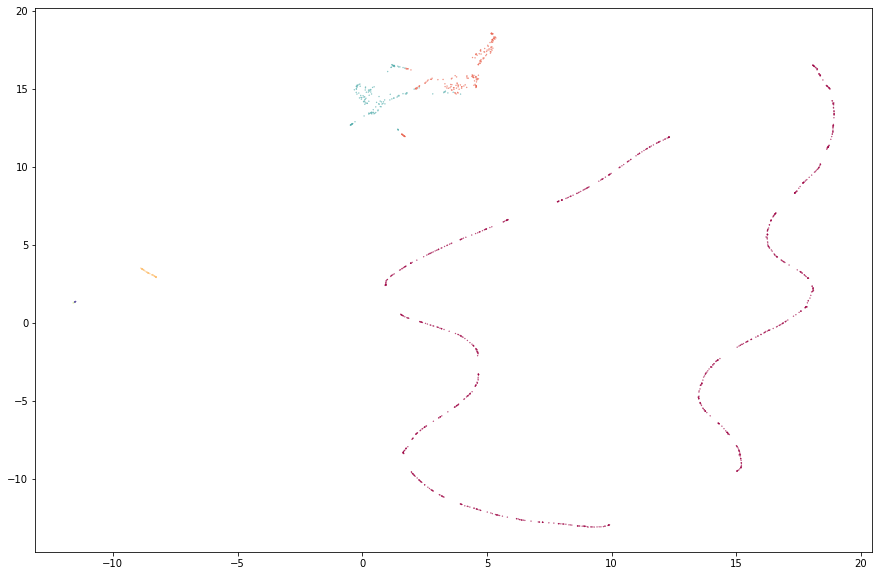

In [16]:
#plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_prediction, s=0.1, cmap='Spectral')
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_prediction, s=0.1, cmap='Spectral')

In [22]:
clusters = kmeans.cluster_centers_

In [23]:
def _distance(point_a, point_b):
    delta = point_a - point_b
    return np.sqrt(np.matmul(delta, delta.T))

In [24]:
def min_distance_from_cluster(row):
    return min(_distance(cluster, row) for cluster in clusters)

In [20]:
distances = np.apply_along_axis(min_distance_from_cluster, 1, encoded_space)

NameError: name 'clusters' is not defined

In [ ]:
raw_centroid_df['creativity'] = distances

In [ ]:
raw_centroid_df = raw_centroid_df.sort_values('creativity', ascending=False)

In [ ]:
raw_centroid_df.tail(10)

In [ ]:
raw_centroid_df.head(10)

In [ ]:
sns.distplot(distances)

In [ ]:
def summarize_player(player_name):
    d = raw_centroid_df[raw_centroid_df.self_name.str.lower() == player_name.lower()].creativity
    print(d.describe())
    return sns.distplot(d)

In [ ]:
summarize_player('showtime')


In [ ]:
summarize_player("has")

In [ ]:
summarize_player("maxpax")

In [ ]:
summarize_player("stats")